Part -1


Load and Plot Data

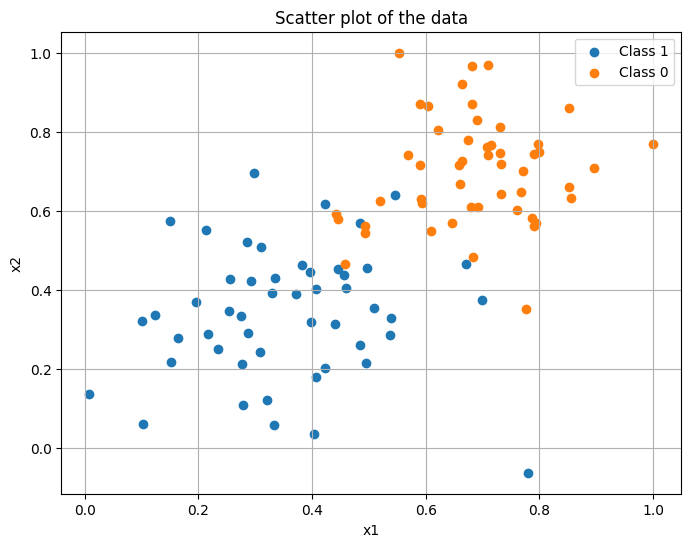

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("/content/data.csv", header=None)
df.columns = ['x1', 'x2', 'label']

plt.figure(figsize=(8, 6))
for label in df['label'].unique():
    subset = df[df['label'] == label]
    plt.scatter(subset['x1'], subset['x2'], label=f'Class {label}')
plt.title('Scatter plot of the data')
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()
plt.grid(True)
plt.show()

Implement Perceptron (Heuristic Rule)

In [41]:
X = df[['x1', 'x2']].values
y = df['label'].values
X_bias = np.c_[np.ones(X.shape[0]), X]
def perceptron_heuristic(X, y, lr=0.1, epochs=20):
    w = np.random.randn(X.shape[1])
    boundaries = [w.copy()]
    update_count = 0

    for epoch in range(epochs):
        for i in range(len(X)):
            activation = np.dot(X[i], w)
            pred = 1 if activation >= 0 else 0
            if pred != y[i]:
                w += lr * (y[i] - pred) * X[i]
                update_count += 1
                boundaries.append(w.copy())
    return boundaries, update_count

boundaries, update_count = perceptron_heuristic(X_bias, y, lr=0.1, epochs=20)
print("Number of updates:", update_count)
print("Initial weights:", boundaries[0])
print("Final weights:", boundaries[-1])

Number of updates: 94
Initial weights: [ 1.13870973  0.77271514 -0.18449577]
Final weights: [ 0.53870973 -0.40369186 -0.78443577]


Plot the initial separation

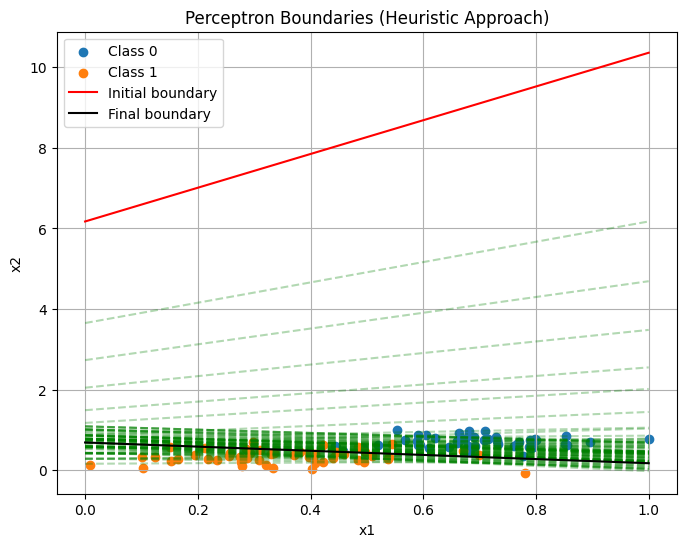

In [48]:
def plot_decision_boundaries(X, y, boundaries):
    plt.figure(figsize=(8, 6))

    for label in np.unique(y):
        plt.scatter(X[y == label, 1], X[y == label, 2], label=f'Class {label}')

    x_vals = np.array([0, 1])
    for i, w in enumerate(boundaries):
        y_vals = -(w[0] + w[1] * x_vals) / w[2]
        if i == 0:
            plt.plot(x_vals, y_vals, 'r-', label='Initial boundary')
        elif i == len(boundaries) - 1:
            plt.plot(x_vals, y_vals, 'k-', label='Final boundary')
        else:
            plt.plot(x_vals, y_vals, 'g--', alpha=0.3)

    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.title('Perceptron Boundaries (Heuristic Approach)')
    plt.legend()
    plt.grid(True)
    plt.show()
plot_decision_boundaries(X_bias, y, boundaries)

Learning Rates



Training with learning_rate = 0.01, epochs = 10
Number of updates: 272
Initial weights: [-1.0228409  -2.96031371 -1.70975504]
Final weights: [ 1.4171591  -1.98224083 -0.8613751 ]


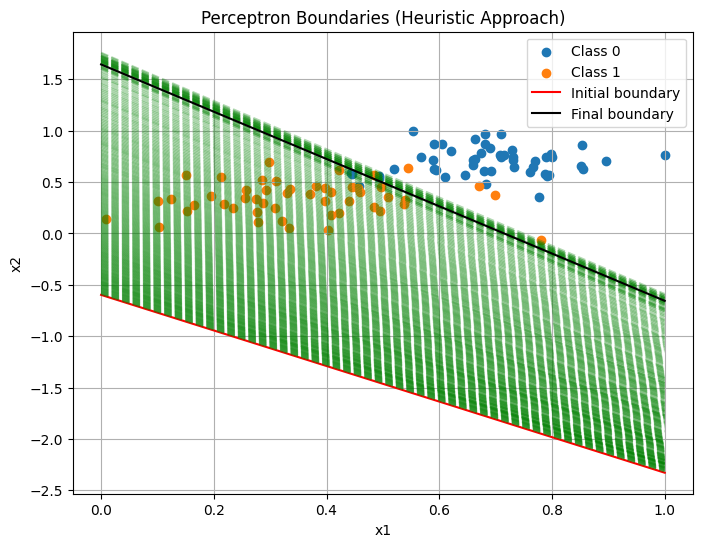


Training with learning_rate = 0.1, epochs = 10
Number of updates: 34
Initial weights: [ 0.21344613 -0.37462743 -0.45916929]
Final weights: [ 0.41344613 -0.30929943 -0.61125519]


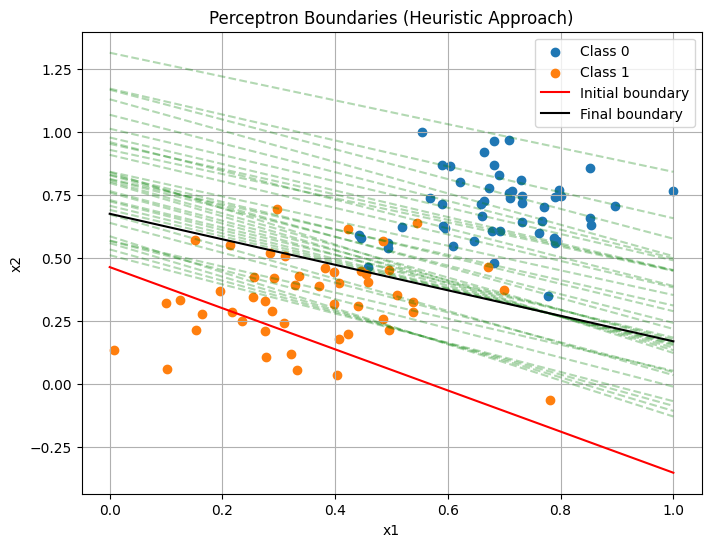


Training with learning_rate = 1.0, epochs = 10
Number of updates: 33
Initial weights: [1.2641308  0.18003151 0.81640657]
Final weights: [ 2.2641308  -1.59620849 -4.62100943]


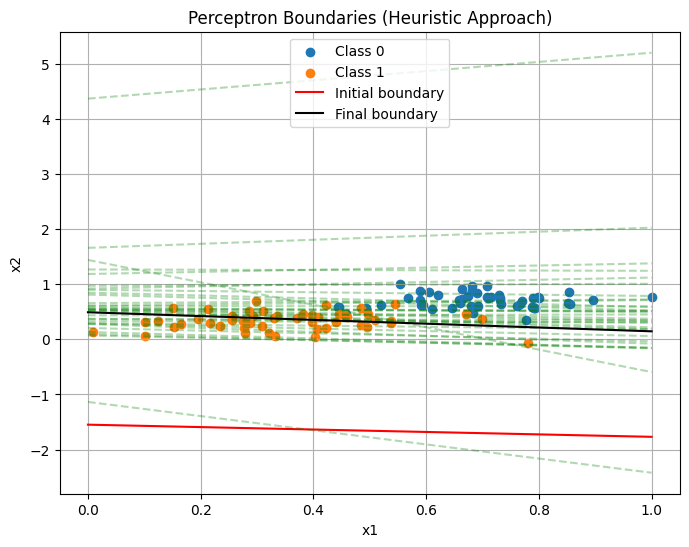

In [49]:
learning_rates = [0.01, 0.1, 1.0]
epochs = 10

for lr in learning_rates:
    print(f"\nTraining with learning_rate = {lr}, epochs = {epochs}")
    boundaries, update_count = perceptron_heuristic(X_bias, y, lr=lr, epochs=epochs)
    print("Number of updates:", update_count)
    print("Initial weights:", boundaries[0])
    print("Final weights:", boundaries[-1])

    plot_decision_boundaries(X_bias, y, boundaries)

Part- 2

Plot the data

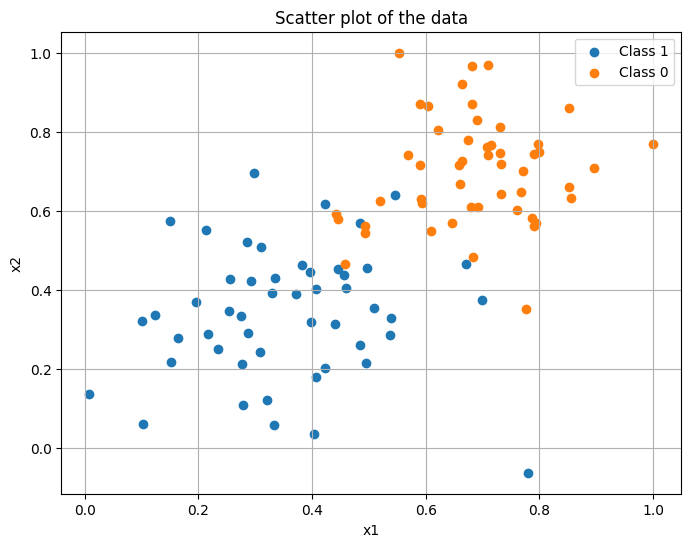

In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("/content/data.csv", header=None)
df.columns = ['x1', 'x2', 'label']

plt.figure(figsize=(8, 6))
for label in df['label'].unique():
    subset = df[df['label'] == label]
    plt.scatter(subset['x1'], subset['x2'], label=f'Class {label}')
plt.title('Scatter plot of the data')
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()
plt.grid(True)
plt.show()

Implement perceptron using the Gradient
Descent

In [51]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def gradient_descent_perceptron(X, y, lr=0.1, epochs=10):
    w = np.random.randn(X.shape[1])
    boundaries = [w.copy()]
    losses = []

    for epoch in range(epochs):
        y_hat = sigmoid(X @ w)
        error = y - y_hat
        loss = -np.mean(y * np.log(y_hat + 1e-8) + (1 - y) * np.log(1 - y_hat + 1e-8))
        losses.append(loss)
        w += lr * X.T @ error
        boundaries.append(w.copy())

    return boundaries, losses

X = df[['x1', 'x2']].values
y = df['label'].values
X_bias = np.c_[np.ones(X.shape[0]), X]

boundaries, losses = gradient_descent_perceptron(X_bias, y, lr=0.1, epochs=100)

final_weights = boundaries[-1]
rounded_weights = [round(w, 2) for w in final_weights]
rounded_losses = [round(l, 3) for l in losses[:5]]

print("Final weight vector (after 10 epochs):")
print(rounded_weights)
print("\nFirst 5 log loss values (training progress):")
print(rounded_losses)

Final weight vector (after 10 epochs):
[np.float64(10.13), np.float64(-9.34), np.float64(-9.98)]

First 5 log loss values (training progress):
[np.float64(0.612), np.float64(0.547), np.float64(0.514), np.float64(0.583), np.float64(0.988)]


Plot the initial separation line

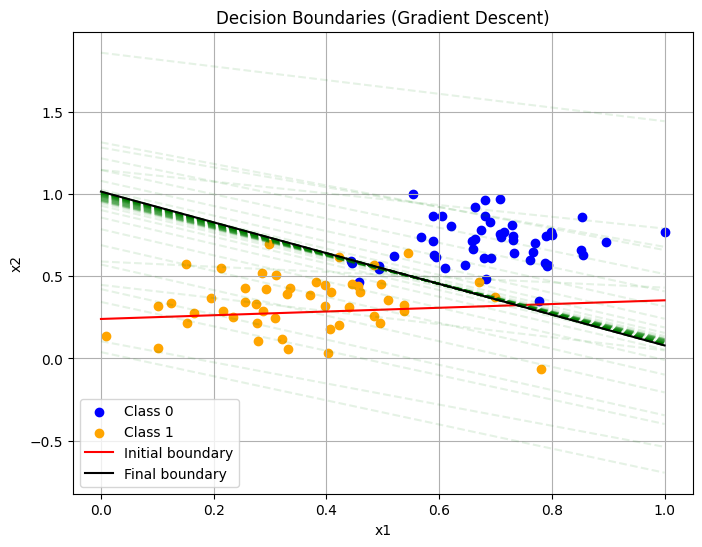

In [52]:
def plot_boundaries(X, y, boundaries, title="Decision Boundaries"):
    plt.figure(figsize=(8, 6))
    plt.scatter(X[y==0][:,1], X[y==0][:,2], c='blue', label='Class 0')
    plt.scatter(X[y==1][:,1], X[y==1][:,2], c='orange', label='Class 1')

    x_vals = np.array([0, 1])
    for i, w in enumerate(boundaries):
        y_vals = -(w[0] + w[1] * x_vals) / w[2]
        if i == 0:
            plt.plot(x_vals, y_vals, 'r-', label='Initial boundary')
        elif i == len(boundaries) - 1:
            plt.plot(x_vals, y_vals, 'k-', label='Final boundary')
        else:
            plt.plot(x_vals, y_vals, 'g--', alpha=0.1)

    plt.xlabel("x1")
    plt.ylabel("x2")
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.show()
plot_boundaries(X_bias, y, boundaries, title="Decision Boundaries (Gradient Descent)")

Compute log loss (error)

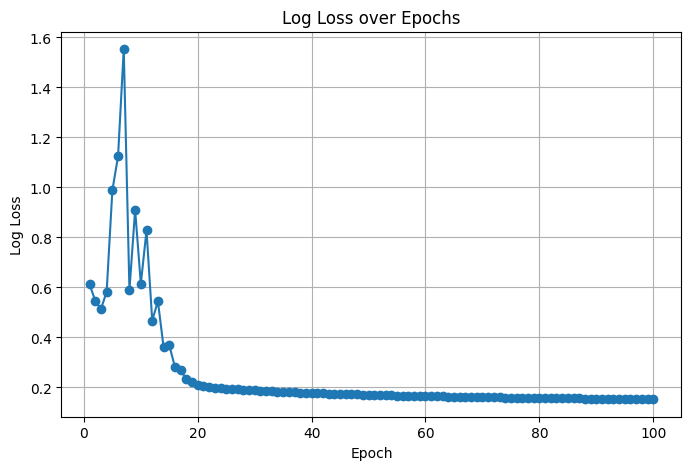

In [53]:
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(losses)+1), losses, marker='o')
plt.title('Log Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Log Loss')
plt.grid(True)
plt.show()

Learning rate


Training with learning_rate = 0.01, total_epochs = 100
Final weight vector (after training):
[np.float64(-0.19), np.float64(-0.6), np.float64(-0.06)]
Log loss values every 10 epochs:
[np.float64(0.694), np.float64(0.692), np.float64(0.689), np.float64(0.687), np.float64(0.685), np.float64(0.683), np.float64(0.681), np.float64(0.679), np.float64(0.677), np.float64(0.675)]


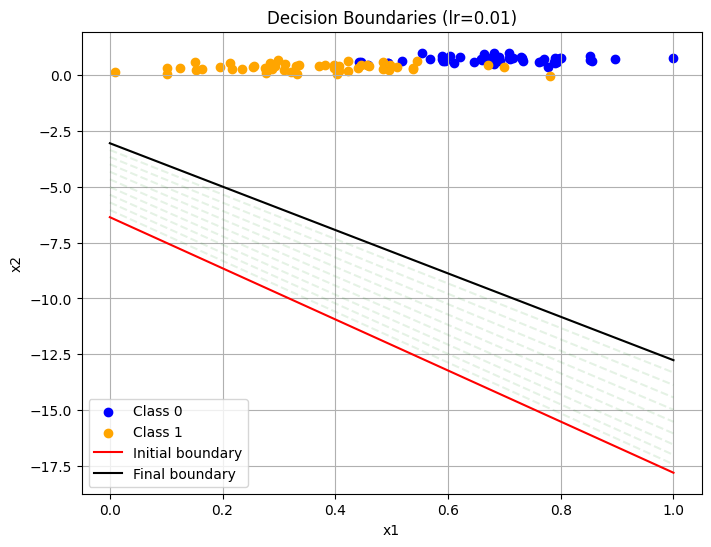

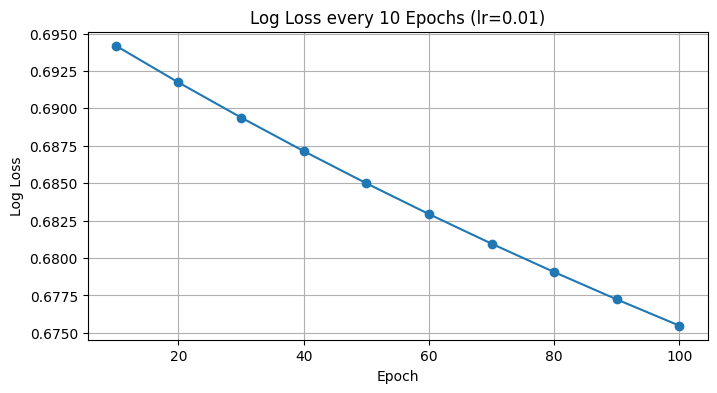


Training with learning_rate = 0.1, total_epochs = 100
Final weight vector (after training):
[np.float64(0.73), np.float64(-1.3), np.float64(-0.48)]
Log loss values every 10 epochs:
[np.float64(0.628), np.float64(0.62), np.float64(0.612), np.float64(0.604), np.float64(0.597), np.float64(0.59), np.float64(0.583), np.float64(0.577), np.float64(0.57), np.float64(0.564)]


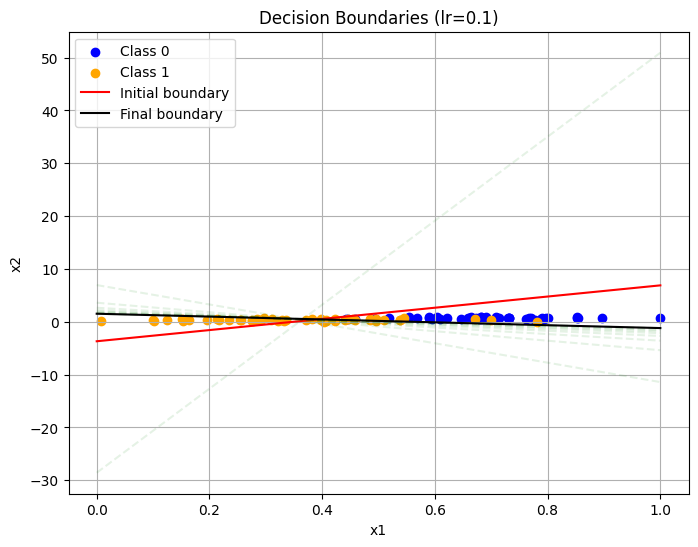

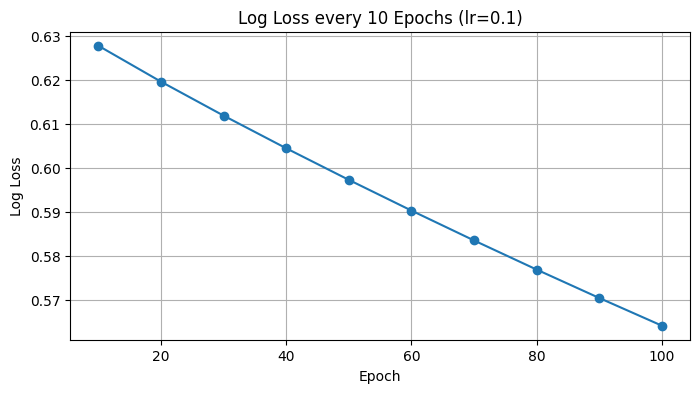


Training with learning_rate = 1.0, total_epochs = 100
Final weight vector (after training):
[np.float64(3.3), np.float64(-2.74), np.float64(-3.8)]
Log loss values every 10 epochs:
[np.float64(0.634), np.float64(0.564), np.float64(0.509), np.float64(0.466), np.float64(0.431), np.float64(0.402), np.float64(0.379), np.float64(0.359), np.float64(0.342), np.float64(0.327)]


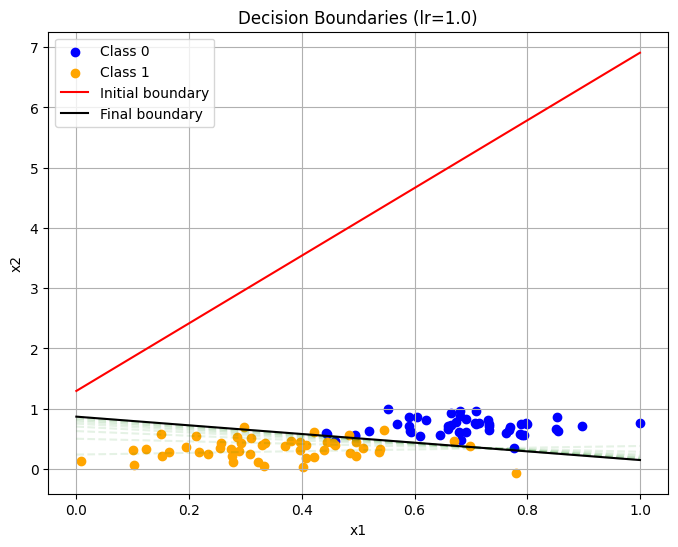

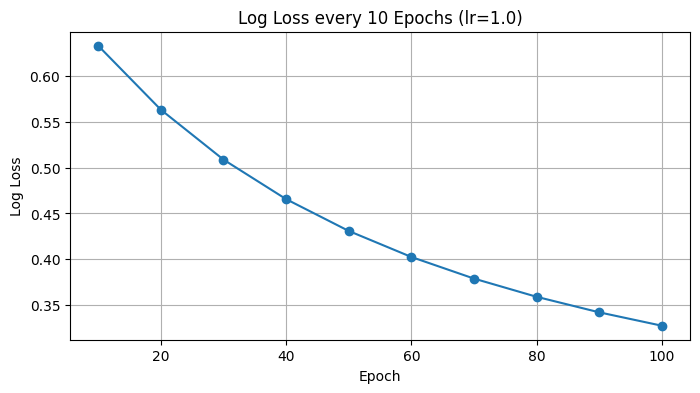

In [54]:
def run_perceptron_every_10_epochs(lr=0.1, total_epochs=100):
    print(f"\nTraining with learning_rate = {lr}, total_epochs = {total_epochs}")

    boundaries = []
    losses_every_10 = []

    w = np.random.randn(X_bias.shape[1])
    boundaries.append(w.copy())

    for epoch in range(1, total_epochs + 1):
        y_pred = 1 / (1 + np.exp(-X_bias @ w))
        error = y - y_pred
        gradient = -X_bias.T @ error / len(y)
        w -= lr * gradient
        boundaries.append(w.copy())


        loss = -np.mean(y * np.log(y_pred + 1e-9) + (1 - y) * np.log(1 - y_pred + 1e-9))

        # Save every 10 epochs
        if epoch % 10 == 0:
            losses_every_10.append(loss)

    final_weights = boundaries[-1]
    rounded_weights = [round(wi, 2) for wi in final_weights]

    print("Final weight vector (after training):")
    print(rounded_weights)
    print("Log loss values every 10 epochs:")
    print([round(l, 3) for l in losses_every_10])

    # Plot decision boundaries
    plot_boundaries(X_bias, y, boundaries[::10] + [boundaries[-1]], title=f"Decision Boundaries (lr={lr})")

    # Plot loss curve every 10 epochs
    plt.figure(figsize=(8, 4))
    plt.plot(range(10, total_epochs + 1, 10), losses_every_10, marker='o')
    plt.title(f"Log Loss every 10 Epochs (lr={lr})")
    plt.xlabel("Epoch")
    plt.ylabel("Log Loss")
    plt.grid(True)
    plt.show()

run_perceptron_every_10_epochs(lr=0.01, total_epochs=100)
run_perceptron_every_10_epochs(lr=0.1, total_epochs=100)
run_perceptron_every_10_epochs(lr=1.0, total_epochs=100)